### EN ESTE NOTEBOOK sacaremos un modelo de Clusetering con un modelo de Machine Learning No Supervisado : KNN

In [ ]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

# time calculation to track some processes
import time

# numeric and matrix operations
import numpy as np
import pandas as pd

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

# Empezaremos el trabajo con el dataset merged de la ultima partition (del ultimo mes)

In [49]:
df = pd.read_pickle(r'G:\Mi unidad\Master Data Science - Nuclio Digital School\Proyecto Final de Master\Capstone Project\EasyMoney\Datasets\last_partition\df_lastpartition')


In [50]:
df.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,...,debit_card,em_account_p,em_acount,sales_em_acount,sales_debit_card,sales_payroll_account,sales_emc_account,sales_pension_plan,sales_payroll,tenencia
5519929,657826,2019-05-28,2015-05-24,013,1.0,02 - PARTICULARES,ES,25,H,44,...,0,0,1,1,0,0,0,0,0,1
5519930,657817,2019-05-28,2019-05-12,UNKNOWN,0.0,UNKNOWN,ES,8,V,32,...,0,0,0,0,0,0,0,0,0,0
5519931,657986,2019-05-28,2016-02-18,KAF,1.0,02 - PARTICULARES,ES,41,H,39,...,1,0,0,0,1,1,1,1,1,6
5519932,657905,2019-05-28,2017-02-07,KAT,1.0,01 - TOP,ES,28,H,85,...,0,0,1,1,0,0,0,0,0,2
5519933,657336,2019-05-28,2019-03-28,KAT,1.0,02 - PARTICULARES,ES,28,V,38,...,0,0,1,1,0,0,0,0,0,1


In [51]:
df.columns

Index(['pk_cid', 'pk_partition', 'entry_date', 'entry_channel',
       'active_customer', 'segment', 'country_id', 'region_code', 'gender',
       'age', 'deceased', 'salary', 'age_group', 'short_term_deposit', 'loans',
       'mortgage', 'funds', 'securities', 'long_term_deposit', 'em_account_pp',
       'credit_card', 'payroll', 'pension_plan', 'payroll_account',
       'emc_account', 'debit_card', 'em_account_p', 'em_acount',
       'sales_em_acount', 'sales_debit_card', 'sales_payroll_account',
       'sales_emc_account', 'sales_pension_plan', 'sales_payroll', 'tenencia'],
      dtype='object')

In [52]:
df.shape

(442995, 35)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442995 entries, 5519929 to 5962923
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   pk_cid                 442995 non-null  int64  
 1   pk_partition           442995 non-null  object 
 2   entry_date             442995 non-null  object 
 3   entry_channel          442995 non-null  object 
 4   active_customer        442995 non-null  float64
 5   segment                442995 non-null  object 
 6   country_id             442995 non-null  object 
 7   region_code            442995 non-null  int64  
 8   gender                 442995 non-null  object 
 9   age                    442995 non-null  int64  
 10  deceased               442995 non-null  int64  
 11  salary                 442995 non-null  float64
 12  age_group              442995 non-null  int64  
 13  short_term_deposit     442995 non-null  int64  
 14  loans                  442995

In [54]:
df.columns.to_list()

['pk_cid',
 'pk_partition',
 'entry_date',
 'entry_channel',
 'active_customer',
 'segment',
 'country_id',
 'region_code',
 'gender',
 'age',
 'deceased',
 'salary',
 'age_group',
 'short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'em_account_pp',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount',
 'sales_em_acount',
 'sales_debit_card',
 'sales_payroll_account',
 'sales_emc_account',
 'sales_pension_plan',
 'sales_payroll',
 'tenencia']

In [55]:
df[df.duplicated()]

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,...,debit_card,em_account_p,em_acount,sales_em_acount,sales_debit_card,sales_payroll_account,sales_emc_account,sales_pension_plan,sales_payroll,tenencia


In [56]:
df.isnull().sum()

pk_cid                   0
pk_partition             0
entry_date               0
entry_channel            0
active_customer          0
segment                  0
country_id               0
region_code              0
gender                   0
age                      0
deceased                 0
salary                   0
age_group                0
short_term_deposit       0
loans                    0
mortgage                 0
funds                    0
securities               0
long_term_deposit        0
em_account_pp            0
credit_card              0
payroll                  0
pension_plan             0
payroll_account          0
emc_account              0
debit_card               0
em_account_p             0
em_acount                0
sales_em_acount          0
sales_debit_card         0
sales_payroll_account    0
sales_emc_account        0
sales_pension_plan       0
sales_payroll            0
tenencia                 0
dtype: int64

# Vamos a añadir una nueva columna con la población por cada region para poder entrenar el modelo

Nos permitirá poder trabajar guardar la columna "region_code" en nuestro modelo

Hemos sacado los datos INE Instituto Nacional de Estadísticas

In [57]:
pob_es_2019 = pd.read_csv(r'G:\Mi unidad\Master Data Science - Nuclio Digital School\Proyecto Final de Master\Capstone Project\EasyMoney\Datasets\poblacion_espana_2019_ine.csv', encoding='latin1', sep=';')
pob_es_2019.head()

,Region Code,Nombre Provincias,Sexo,Periodo,Total
0,0,Extranjeros,Total,2019,-1000000
1,2,Albacete,Total,2019,388.167
2,3,Alicante/Alacant,Total,2019,1.858.683
3,4,Almería,Total,2019,716.820
4,1,Araba/Álava,Total,2019,331.549


A los clientes que no son presentes en España. Hemos visto que no representan más de 1% del dataset, los hemos puesto un valor de -1.000.000

In [58]:
pob_es_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Region Code        53 non-null     int64 
 1   Nombre Provincias  53 non-null     object
 2   Sexo               53 non-null     object
 3   Periodo            53 non-null     int64 
 4   Total              53 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [59]:
#la columna 'population' es de tipo objeto (string) de momento. Vamos a ir cambiandola a numero (int) 

pob_es_2019['Total'] = pob_es_2019['Total'].str.replace('.', '').astype(int)
pob_es_2019.head()

,Region Code,Nombre Provincias,Sexo,Periodo,Total
0,0,Extranjeros,Total,2019,-1000000
1,2,Albacete,Total,2019,388167
2,3,Alicante/Alacant,Total,2019,1858683
3,4,Almería,Total,2019,716820
4,1,Araba/Álava,Total,2019,331549


In [60]:
#cambiamos los titulos de la columna "Nombre Provincias" a "region_code" para poder hacer el merge con nuestro dataset

pob_es_2019.rename(columns={"Region Code": "region_code", "Total": "population"}, inplace=True)
pob_es_2019.head()

,region_code,Nombre Provincias,Sexo,Periodo,population
0,0,Extranjeros,Total,2019,-1000000
1,2,Albacete,Total,2019,388167
2,3,Alicante/Alacant,Total,2019,1858683
3,4,Almería,Total,2019,716820
4,1,Araba/Álava,Total,2019,331549


In [61]:
df = pd.merge(df,pob_es_2019[['region_code','population']],on='region_code', how='left')
df.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,...,em_account_p,em_acount,sales_em_acount,sales_debit_card,sales_payroll_account,sales_emc_account,sales_pension_plan,sales_payroll,tenencia,population
0,657826,2019-05-28,2015-05-24,013,1.0,02 - PARTICULARES,ES,25,H,44,...,0,1,1,0,0,0,0,0,1,434930
1,657817,2019-05-28,2019-05-12,UNKNOWN,0.0,UNKNOWN,ES,8,V,32,...,0,0,0,0,0,0,0,0,0,5664579
2,657986,2019-05-28,2016-02-18,KAF,1.0,02 - PARTICULARES,ES,41,H,39,...,0,0,0,1,1,1,1,1,6,1942389
3,657905,2019-05-28,2017-02-07,KAT,1.0,01 - TOP,ES,28,H,85,...,0,1,1,0,0,0,0,0,2,6663394
4,657336,2019-05-28,2019-03-28,KAT,1.0,02 - PARTICULARES,ES,28,V,38,...,0,1,1,0,0,0,0,0,1,6663394


# Columnas que vamos a usar para la segmentación : (version 2)

In [62]:
col_segment = [
'pk_cid',
'pk_partition',
'entry_date',
'population',
'age',
'salary',
'tenencia'
]

In [63]:
df_seg =df[col_segment]

Implentamos pk_cid y pk_partition como indice

In [64]:
df_seg.set_index(['pk_cid', 'pk_partition'], inplace=True)
df_seg.head()

,,entry_date,population,age,salary,tenencia
pk_cid,pk_partition,,,,,
657826,2019-05-28,2015-05-24,434930,44,54493.38,1
657817,2019-05-28,2019-05-12,5664579,32,114632.76,0
657986,2019-05-28,2016-02-18,1942389,39,100993.17,6
657905,2019-05-28,2017-02-07,6663394,85,154059.10,2
657336,2019-05-28,2019-03-28,6663394,38,112864.66,1


## Tratamos los categoricos

Para la columna "entry_date" vamos transformarla en una columna numerica donde cada cliente tendrá el numero de més como cliente desde que ha entratado en el dataset (numeros de meses como cliente)

In [65]:
col_categorical = list(df_seg.select_dtypes(include=['object','category']).columns)
col_categorical

['entry_date']

In [66]:
df_seg[col_categorical]

,,entry_date
pk_cid,pk_partition,
657826,2019-05-28,2015-05-24
657817,2019-05-28,2019-05-12
657986,2019-05-28,2016-02-18
657905,2019-05-28,2017-02-07
657336,2019-05-28,2019-03-28
...,...,...
1166765,2019-05-28,2016-08-14
1166764,2019-05-28,2016-08-14
1166763,2019-05-28,2016-08-14


entry_date : vamos a cambiar el tipo de la columna a fecha

In [68]:
df_seg['entry_date'] = pd.to_datetime(df_seg['entry_date'])

In [69]:
df_seg.head()

,,entry_date,population,age,salary,tenencia
pk_cid,pk_partition,,,,,
657826,2019-05-28,2015-05-24,434930,44,54493.38,1
657817,2019-05-28,2019-05-12,5664579,32,114632.76,0
657986,2019-05-28,2016-02-18,1942389,39,100993.17,6
657905,2019-05-28,2017-02-07,6663394,85,154059.10,2
657336,2019-05-28,2019-03-28,6663394,38,112864.66,1


In [70]:
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 442995 entries, (657826, '2019-05-28') to (1550586, '2019-05-28')
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   entry_date  442995 non-null  datetime64[ns]
 1   population  442995 non-null  int32         
 2   age         442995 non-null  int64         
 3   salary      442995 non-null  float64       
 4   tenencia    442995 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2)
memory usage: 36.8+ MB


Sacamos los años para transformar la fecha en valores numericas

In [71]:
df_seg['entry_date_year_month'] = df_seg['entry_date'].dt.strftime('%Y-%m')
df_seg['entry_date_year_month']

#La guardamos a un formato Año-Mes

pk_cid   pk_partition
657826   2019-05-28      2015-05
657817   2019-05-28      2019-05
657986   2019-05-28      2016-02
657905   2019-05-28      2017-02
657336   2019-05-28      2019-03
                          ...   
1166765  2019-05-28      2016-08
1166764  2019-05-28      2016-08
1166763  2019-05-28      2016-08
1166789  2019-05-28      2016-08
1550586  2019-05-28      2019-05
Name: entry_date_year_month, Length: 442995, dtype: object

In [72]:
df_seg.head()

,,entry_date,population,age,salary,tenencia,entry_date_year_month
pk_cid,pk_partition,,,,,,
657826,2019-05-28,2015-05-24,434930,44,54493.38,1,2015-05
657817,2019-05-28,2019-05-12,5664579,32,114632.76,0,2019-05
657986,2019-05-28,2016-02-18,1942389,39,100993.17,6,2016-02
657905,2019-05-28,2017-02-07,6663394,85,154059.10,2,2017-02
657336,2019-05-28,2019-03-28,6663394,38,112864.66,1,2019-03


In [73]:
df_seg['entry_date_year_month'].min()

'2015-01'

In [74]:
df_seg['entry_date_year_month'].max()

'2019-05'

In [75]:
len(df_seg['entry_date_year_month'].unique())

53

Hay 53 meses diferente con un minimo de "2015-01" hasta "2019-05"

### Creamos una nueva columna con el numero de month que el cliente pertenece al dataset

In [76]:
# Definir la lista de fecha entre la minima y la maxima
dates = ['2019-05', '2019-04', '2019-03', '2019-02', '2019-01', '2018-12', '2018-11', '2018-10', '2018-09', '2018-08',
         '2018-07', '2018-06', '2018-05', '2018-04', '2018-03', '2018-02', '2018-01', '2017-12', '2017-11', '2017-10',
         '2017-09', '2017-08', '2017-07', '2017-06', '2017-05', '2017-04', '2017-03', '2017-02', '2017-01', '2016-12',
         '2016-11', '2016-10', '2016-09', '2016-08', '2016-07', '2016-06', '2016-05', '2016-04', '2016-03', '2016-02',
         '2016-01', '2015-12', '2015-11', '2015-10', '2015-09', '2015-08', '2015-07', '2015-06', '2015-05', '2015-04',
         '2015-03', '2015-02', '2015-01']

# Crear el Dataset
df_dates = pd.DataFrame({'entry_date_year_month': dates})

# Convertir la columna 'entry_date_year_month' a tipo datetime
df_dates['entry_date_year_month'] = pd.to_datetime(df_dates['entry_date_year_month'], format='%Y-%m')

# Calcular los valores de cada mes de entrada (si entra en 2019-05 el cliente tiene 0 meses como cliente)
df_dates['months_since_start'] = range(len(df_dates))

# Print the resulting DataFrame
print(df_dates)

   entry_date_year_month  months_since_start
0             2019-05-01                   0
1             2019-04-01                   1
2             2019-03-01                   2
3             2019-02-01                   3
4             2019-01-01                   4
5             2018-12-01                   5
6             2018-11-01                   6
7             2018-10-01                   7
8             2018-09-01                   8
9             2018-08-01                   9
10            2018-07-01                  10
11            2018-06-01                  11
12            2018-05-01                  12
13            2018-04-01                  13
14            2018-03-01                  14
15            2018-02-01                  15
16            2018-01-01                  16
17            2017-12-01                  17
18            2017-11-01                  18
19            2017-10-01                  19
20            2017-09-01                  20
21        

In [80]:
df_seg['entry_date_year_month'] = pd.to_datetime(df_seg['entry_date_year_month'], format='%Y-%m')
df_seg['entry_date_year_month'].sample(10)

pk_cid   pk_partition
1120153  2019-05-28     2016-01-01
1226895  2019-05-28     2016-11-01
1462117  2019-05-28     2018-09-01
1380102  2019-05-28     2018-02-01
1412818  2019-05-28     2018-07-01
1210441  2019-05-28     2016-10-01
1292513  2019-05-28     2017-08-01
1303017  2019-05-28     2017-09-01
1221297  2019-05-28     2016-11-01
1333515  2019-05-28     2017-10-01
Name: entry_date_year_month, dtype: datetime64[ns]

### Realizar el merge con la nueva columna

In [84]:
# Reset the index of df_seg
df_seg = df_seg.reset_index()

In [85]:
df_seg.head()

,pk_cid,pk_partition,entry_date,population,age,salary,tenencia,entry_date_year_month
0,657826,2019-05-28,2015-05-24,434930,44,54493.38,1,2015-05-01
1,657817,2019-05-28,2019-05-12,5664579,32,114632.76,0,2019-05-01
2,657986,2019-05-28,2016-02-18,1942389,39,100993.17,6,2016-02-01
3,657905,2019-05-28,2017-02-07,6663394,85,154059.10,2,2017-02-01
4,657336,2019-05-28,2019-03-28,6663394,38,112864.66,1,2019-03-01


In [86]:
#Procedemos al merge del df_seg :
df_seg = df_seg.merge(df_dates, on='entry_date_year_month', how='left')
df_seg.head()


,pk_cid,pk_partition,entry_date,population,age,salary,tenencia,entry_date_year_month,months_since_start
0,657826,2019-05-28,2015-05-24,434930,44,54493.38,1,2015-05-01,48
1,657817,2019-05-28,2019-05-12,5664579,32,114632.76,0,2019-05-01,0
2,657986,2019-05-28,2016-02-18,1942389,39,100993.17,6,2016-02-01,39
3,657905,2019-05-28,2017-02-07,6663394,85,154059.10,2,2017-02-01,27
4,657336,2019-05-28,2019-03-28,6663394,38,112864.66,1,2019-03-01,2


In [87]:
# Reset the index of df_seg
df_seg = df_seg.set_index(['pk_cid', 'pk_partition'])
df_seg.head()

,,entry_date,population,age,salary,tenencia,entry_date_year_month,months_since_start
pk_cid,pk_partition,,,,,,,
657826,2019-05-28,2015-05-24,434930,44,54493.38,1,2015-05-01,48
657817,2019-05-28,2019-05-12,5664579,32,114632.76,0,2019-05-01,0
657986,2019-05-28,2016-02-18,1942389,39,100993.17,6,2016-02-01,39
657905,2019-05-28,2017-02-07,6663394,85,154059.10,2,2017-02-01,27
657336,2019-05-28,2019-03-28,6663394,38,112864.66,1,2019-03-01,2


In [88]:
#Cambiamos el tipo de value de 'entry_date_year_month'
df_seg['entry_date_year_month'] = df_seg['entry_date'].dt.strftime('%Y-%m')
df_seg['entry_date_year_month']


pk_cid   pk_partition
657826   2019-05-28      2015-05
657817   2019-05-28      2019-05
657986   2019-05-28      2016-02
657905   2019-05-28      2017-02
657336   2019-05-28      2019-03
                          ...   
1166765  2019-05-28      2016-08
1166764  2019-05-28      2016-08
1166763  2019-05-28      2016-08
1166789  2019-05-28      2016-08
1550586  2019-05-28      2019-05
Name: entry_date_year_month, Length: 442995, dtype: object

Podemos eliminar la columna 'entry_date' y 'entry_date_year_month'

In [89]:
df_seg.head()

,,entry_date,population,age,salary,tenencia,entry_date_year_month,months_since_start
pk_cid,pk_partition,,,,,,,
657826,2019-05-28,2015-05-24,434930,44,54493.38,1,2015-05,48
657817,2019-05-28,2019-05-12,5664579,32,114632.76,0,2019-05,0
657986,2019-05-28,2016-02-18,1942389,39,100993.17,6,2016-02,39
657905,2019-05-28,2017-02-07,6663394,85,154059.10,2,2017-02,27
657336,2019-05-28,2019-03-28,6663394,38,112864.66,1,2019-03,2


In [90]:
df_seg.drop(['entry_date', 'entry_date_year_month'], axis=1, inplace=True)

In [91]:
col_categorical = list(df_seg.select_dtypes(include=['object','category']).columns)
col_categorical

[]

In [92]:
for col in col_categorical:
    print(df_seg[col].value_counts(normalize=True).sort_values(ascending=False))

In [93]:
df_seg.shape

(442995, 5)

Ya no tenemos más de columnas categoricas

# Elbow curve y recomendación basada en modelos de ML KMeans

### Estandarización del df

In [94]:
#Realizamos un StandardScaler a nuestro dataset

pipe = Pipeline(steps = [
    ("StandardScaler", StandardScaler())
])

In [95]:
df_scaled_transformed = pipe.fit_transform(df_seg)

In [96]:
df_scaled_transformed.head()

,,population,age,salary,tenencia,months_since_start
pk_cid,pk_partition,,,,,
657826,2019-05-28,-0.931505,1.110997,-0.366694,0.010753,1.695287
657817,2019-05-28,1.159074,0.130587,-0.010622,-1.097850,-1.676391
657986,2019-05-28,-0.328891,0.702493,-0.091379,5.553769,1.063098
657905,2019-05-28,1.558355,4.460728,0.222812,1.119356,0.220178
657336,2019-05-28,1.558355,0.620792,-0.021091,0.010753,-1.535905


In [97]:
df_seg.columns

Index(['population', 'age', 'salary', 'tenencia', 'months_since_start'], dtype='object')

### Modelo Kmeans

In [98]:
sse = {}

for k in range(2, 15):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_scaled_transformed)

    sse[k] = clustering_model.inertia_

Fitting pipe with 2 clusters


Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters


# Elbow Curve

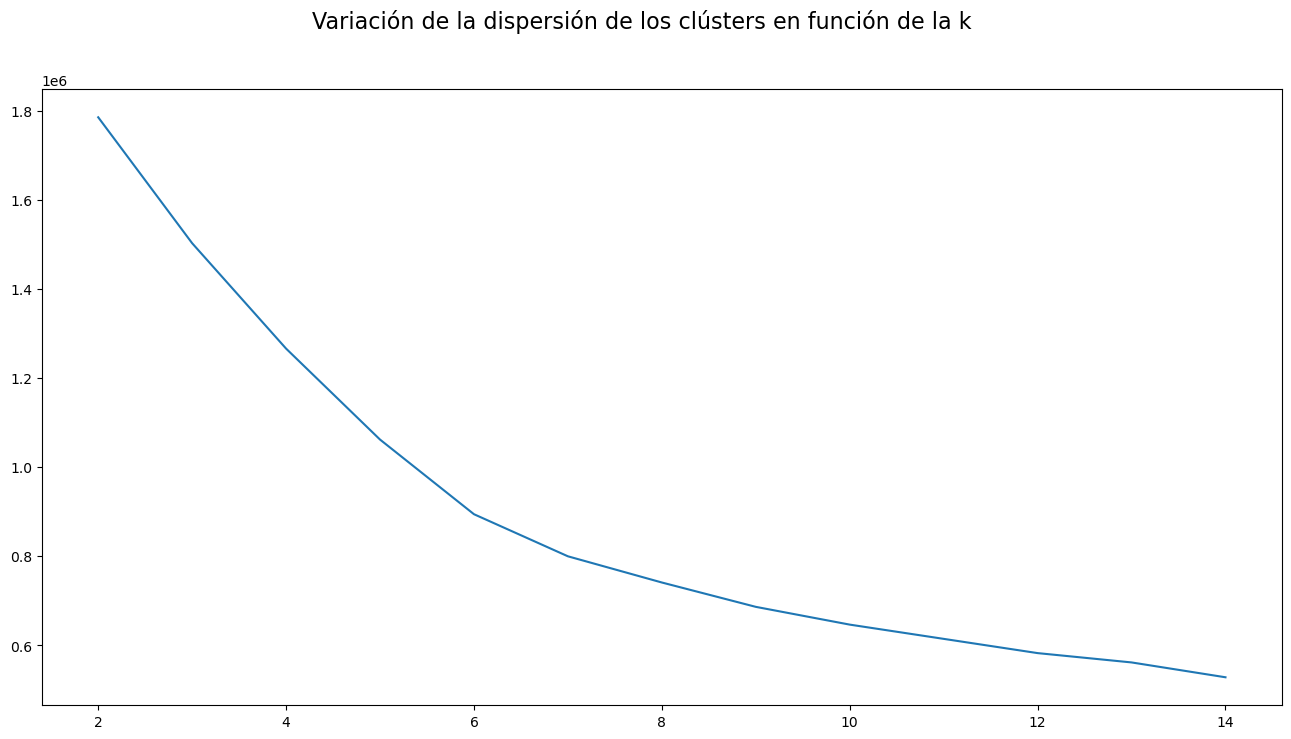

In [99]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

Observamos que la K quien genera una clusterización optima para el modelo es de 6

# Segmentación de los clientes con la "k adecuada"


In [100]:
pipe = Pipeline(steps = [
    ("StandardScaler", StandardScaler()),
    ("Clustering", KMeans(n_clusters = 6, random_state = 175))
])

In [101]:
df_seg.shape

(442995, 5)

In [102]:
pipe.fit(df_seg)

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('Clustering', KMeans(n_clusters=6, random_state=175))])

In [103]:
labels = pipe.predict(df_seg)

In [104]:
X_processed = df_seg

In [105]:
X_processed.head()

,,population,age,salary,tenencia,months_since_start
pk_cid,pk_partition,,,,,
657826,2019-05-28,434930,44,54493.38,1,48
657817,2019-05-28,5664579,32,114632.76,0,0
657986,2019-05-28,1942389,39,100993.17,6,39
657905,2019-05-28,6663394,85,154059.10,2,27
657336,2019-05-28,6663394,38,112864.66,1,2


In [106]:
# le asignamos al DataFrame procesado el clúster.
# si lo hacemos al df escalado será más díficil de interpretar los resultados porque los números están escalados
X_processed["cluster"] = labels

In [107]:
X_processed.shape

(442995, 6)

# Ficha de los clientes

In [124]:
ficha_df = pd.DataFrame()

In [125]:
for i, col in enumerate(["salary", "tenencia", 'months_since_start', "age", 'population' ]):
    resumen_data = X_processed[["cluster", col]].groupby("cluster").describe().T[1:]
    ficha_df = ficha_df.append(resumen_data)

In [126]:
# generamos nuestro multiindex
out_index = [
    "Monetarios",
    "Fidelización",
    "Fidelización",
    "Sociodemográfico",
    "Sociodemográfico"
    
]

inner_index = [
    "Salario",
    "Numero de Productos",
    "Meses Cliente",
    "Edad",
    "Población"
]

estadisticos = ["Media", "Desviación", "Mínimo", "Perc. 25", "Perc. 50", "Perc. 75", "Máximo"]

new_multi_index = []

for oi, ii, in zip(out_index, inner_index):
    for es in estadisticos:
        new_multi_index.append((oi, ii, es))

In [127]:
def generate_multiindex(list_of_tuples, names):
    return pd.MultiIndex.from_tuples(list_of_tuples, names = names)

In [128]:
names = ["Grupo Indicadores", "Indicador", "Estadístico"]
index_ficha = generate_multiindex(new_multi_index, names)
ficha_df.set_index(index_ficha, inplace = True)

In [129]:
tamaño_clusters = X_processed.groupby("cluster").size().to_frame().T
tamaño_clusters.set_index(generate_multiindex([("General", "Clúster", "Tamaño")] , names), inplace = True)

In [130]:
ficha_df = tamaño_clusters.append(ficha_df)

In [131]:
ficha_df = ficha_df.rename(columns = {
    0 : "Clientes Antiguos",
    1 : "Multiproductos",
    2 : "Clientes +40 años",
    3 : "Clientes -40 años",
    4 : "Sueldos Altos",
    5 : "Nuevos clientes",
})

In [132]:
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)

Guardamos el X_processed en un pickle

In [140]:
X_processed.to_pickle(r'G:\Mi unidad\Master Data Science - Nuclio Digital School\Proyecto Final de Master\Capstone Project\EasyMoney\Project Files\Tanguy\Segmentacion\X_Processed.pickle')

In [141]:
X_processed.head()

,,population,age,salary,tenencia,months_since_start,cluster
pk_cid,pk_partition,,,,,,
657826,2019-05-28,434930,44,54493.38,1,48,0
657817,2019-05-28,5664579,32,114632.76,0,0,3
657986,2019-05-28,1942389,39,100993.17,6,39,1
657905,2019-05-28,6663394,85,154059.10,2,27,2
657336,2019-05-28,6663394,38,112864.66,1,2,3


## Guardar el dataset con los cluster

In [133]:
df_seg.tail()

,pk_cid,pk_partition,population,age,salary,tenencia,months_since_start,cluster
442990,1166765,2019-05-28,964693,22,43912.17,1,33,0
442991,1166764,2019-05-28,316798,23,23334.99,1,33,0
442992,1166763,2019-05-28,964693,47,112864.66,1,33,2
442993,1166789,2019-05-28,964693,22,199592.81,1,33,0
442994,1550586,2019-05-28,6663394,37,112864.66,1,0,3


In [134]:
X_processed.tail()

,,population,age,salary,tenencia,months_since_start,cluster
pk_cid,pk_partition,,,,,,
1166765,2019-05-28,964693,22,43912.17,1,33,0
1166764,2019-05-28,316798,23,23334.99,1,33,0
1166763,2019-05-28,964693,47,112864.66,1,33,2
1166789,2019-05-28,964693,22,199592.81,1,33,0
1550586,2019-05-28,6663394,37,112864.66,1,0,3


In [135]:
df_seg.head()

,pk_cid,pk_partition,population,age,salary,tenencia,months_since_start,cluster
0,657826,2019-05-28,434930,44,54493.38,1,48,0
1,657817,2019-05-28,5664579,32,114632.76,0,0,3
2,657986,2019-05-28,1942389,39,100993.17,6,39,1
3,657905,2019-05-28,6663394,85,154059.10,2,27,2
4,657336,2019-05-28,6663394,38,112864.66,1,2,3


In [136]:
X_processed.head()

,,population,age,salary,tenencia,months_since_start,cluster
pk_cid,pk_partition,,,,,,
657826,2019-05-28,434930,44,54493.38,1,48,0
657817,2019-05-28,5664579,32,114632.76,0,0,3
657986,2019-05-28,1942389,39,100993.17,6,39,1
657905,2019-05-28,6663394,85,154059.10,2,27,2
657336,2019-05-28,6663394,38,112864.66,1,2,3


Observamos que los datasets son ordenados de manera identica

Añadimos la columna a df_seg

In [ ]:
df_seg['cluster'] = 0
df_seg['cluster'] = X_processed['cluster']
df_seg.head()

Procedemos al merge de la columna 'cluster' entre df_seg y df

In [ ]:
df_seg = df_seg.reset_index()
df_seg.head()

,pk_cid,pk_partition,population,age,salary,tenencia,months_since_start,cluster
0,657826,2019-05-28,434930,44,54493.38,1,48,0
1,657817,2019-05-28,5664579,32,114632.76,0,0,3
2,657986,2019-05-28,1942389,39,100993.17,6,39,1
3,657905,2019-05-28,6663394,85,154059.10,2,27,2
4,657336,2019-05-28,6663394,38,112864.66,1,2,3


In [ ]:
df = df.merge(df_seg[['pk_cid', 'pk_partition', 'cluster']], on=['pk_cid', 'pk_partition'], how='left')
df.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,...,em_acount,sales_em_acount,sales_debit_card,sales_payroll_account,sales_emc_account,sales_pension_plan,sales_payroll,tenencia,population,cluster
0,657826,2019-05-28,2015-05-24,013,1.0,02 - PARTICULARES,ES,25,H,44,...,1,1,0,0,0,0,0,1,434930,0
1,657817,2019-05-28,2019-05-12,UNKNOWN,0.0,UNKNOWN,ES,8,V,32,...,0,0,0,0,0,0,0,0,5664579,3
2,657986,2019-05-28,2016-02-18,KAF,1.0,02 - PARTICULARES,ES,41,H,39,...,0,0,1,1,1,1,1,6,1942389,1
3,657905,2019-05-28,2017-02-07,KAT,1.0,01 - TOP,ES,28,H,85,...,1,1,0,0,0,0,0,2,6663394,2
4,657336,2019-05-28,2019-03-28,KAT,1.0,02 - PARTICULARES,ES,28,V,38,...,1,1,0,0,0,0,0,1,6663394,3
